In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Digraph
from io import StringIO
from IPython.display import Image
from sklearn import tree as tree_display
import pydotplus

### Load Iris dataset and split it on train-test sets

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
y = pd.Series(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Fit Decision tree with our train data

In [3]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Plot Decision tree graph

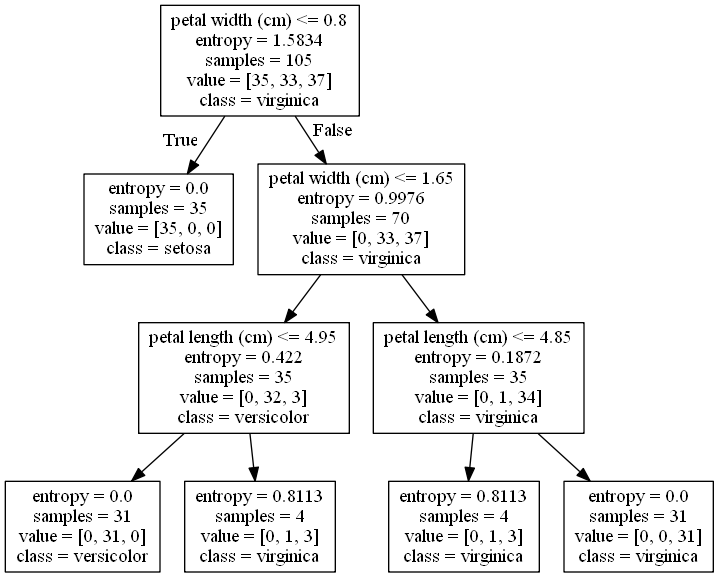

In [13]:
out = StringIO()
tree_display.export_graphviz(tree, out_file=out, feature_names=iris['feature_names'], class_names=iris['target_names'])
graph = pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())